### Load Dependencies

In [1]:
import pandas as pd
import pickle
from sklearn.preprocessing import OneHotEncoder

### Load CSV

In [2]:
df = pd.read_csv("D:/2024/Air_Quality/Data/city_day.csv")
df.head(5)
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

### Information of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
column_types = df.dtypes
print("\nData Types:\n", column_types)


Data Types:
 City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


In [6]:
print(df['City'])

0            Ahmedabad
1            Ahmedabad
2            Ahmedabad
3            Ahmedabad
4            Ahmedabad
             ...      
29526    Visakhapatnam
29527    Visakhapatnam
29528    Visakhapatnam
29529    Visakhapatnam
29530    Visakhapatnam
Name: City, Length: 29531, dtype: object


### Check null values

In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
def fillna_with_mean(df):
    """fill the NaN values with the coloumn mean value"""
    exe_col = ['City', 'Date', 'AQI_Bucket']
    num_col = df.select_dtypes(include=['int64', 'float64']).columns
    num_col = [col for col in num_col if col not in exe_col]
    for col in num_col:
        mean = df[col].mean()
        df[col] = df[col].fillna(mean)
    return df

In [9]:
df = fillna_with_mean(df)

### Create Feature Set

In [10]:
x1 = df.iloc[:,:14].values
x1.shape

(29531, 14)

In [11]:
x1[0]

array(['Ahmedabad', '2015-01-01', 67.45057794890306, 118.12710293078135,
       0.92, 18.22, 17.15, 23.48347601937197, 0.92, 27.64, 133.36, 0.0,
       0.02, 0.0], dtype=object)

In [12]:
y1 = df.iloc[:,14:15].values
y1.shape

(29531, 1)

In [13]:
z1 = pd.DataFrame(x1, columns=df.columns[:14])
z1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.0,0.02,0.0
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.5,3.77
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.4,19.3,29.7,23.483476,17.4,29.07,30.7,6.8,16.4,2.25
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.7,18.48,17.97,23.483476,1.7,18.59,36.08,4.43,10.14,1.0
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.1,21.42,37.76,23.483476,22.1,39.33,39.31,7.01,18.89,2.78


In [14]:
# drop date colume
z1=z1.drop(["Date"], axis=1)

In [15]:
z1.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.0,0.02,0.0
1,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.5,3.77
2,Ahmedabad,67.450578,118.127103,17.4,19.3,29.7,23.483476,17.4,29.07,30.7,6.8,16.4,2.25
3,Ahmedabad,67.450578,118.127103,1.7,18.48,17.97,23.483476,1.7,18.59,36.08,4.43,10.14,1.0
4,Ahmedabad,67.450578,118.127103,22.1,21.42,37.76,23.483476,22.1,39.33,39.31,7.01,18.89,2.78


In [16]:
x1 = z1.iloc[:,0:13].values
z1 = pd.DataFrame(x1)

In [17]:
z1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.0,0.02,0.0
1,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.5,3.77
2,Ahmedabad,67.450578,118.127103,17.4,19.3,29.7,23.483476,17.4,29.07,30.7,6.8,16.4,2.25
3,Ahmedabad,67.450578,118.127103,1.7,18.48,17.97,23.483476,1.7,18.59,36.08,4.43,10.14,1.0
4,Ahmedabad,67.450578,118.127103,22.1,21.42,37.76,23.483476,22.1,39.33,39.31,7.01,18.89,2.78


In [18]:
z1[0].nunique()

26

### Final Feature Set

In [19]:
ohe = OneHotEncoder(drop='first')
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:,[0]]).toarray()) #state
feature_set = pd.concat([x_new1,pd.DataFrame(z1.iloc[:,1:].values)],axis=1,sort=False)

In [20]:
ohe.transform([["Ahmedabad"]])

<1x25 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [22]:
pickle.dump(ohe,open("D:/2024/Air_Quality/Models/OneHotEncoder_Featureset.pkl","wb"))

In [23]:
feature_set

,0,1,2,3,4,5,6,7,8,9,...,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.0,0.02,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.5,3.77
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.4,19.3,29.7,23.483476,17.4,29.07,30.7,6.8,16.4,2.25
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.7,18.48,17.97,23.483476,1.7,18.59,36.08,4.43,10.14,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.1,21.42,37.76,23.483476,22.1,39.33,39.31,7.01,18.89,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.68,25.06,19.54,12.47,0.47,8.55,23.3,2.24,12.07,0.73
29527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38
29528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.0
29529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.05,29.26,18.8,10.03,0.52,9.84,28.3,0.0,0.0,0.0


### Model Training

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [25]:
x_train,x_test,y_train,y_test = train_test_split(feature_set,y1,test_size=0.25,random_state=0)

In [26]:

# multiple linear regression model
mreg = LinearRegression()
mreg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_predict = mreg.predict(x_test)

In [28]:
mreg.score(x_test, y_test)

0.7976949966187841

### df2 = pd.DataFrame({'Actual': y_test, 'Predicted':y_predict}) 

In [29]:
print (df) 
from matplotlib import pyplot as plt
#Visualize the best fit line
#df['Date'] = pd.to_datetime(df['Date'])
#df['year'] = df['Date'].dt.year
#year=df['year']

                City        Date      PM2.5        PM10     NO    NO2    NOx  \
0          Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1          Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2          Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3          Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4          Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   
...              ...         ...        ...         ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.020000   50.940000   7.68  25.06  19.54   
29527  Visakhapatnam  2020-06-28  24.380000   74.090000   3.42  26.06  16.53   
29528  Visakhapatnam  2020-06-29  22.910000   65.730000   3.45  29.53  18.33   
29529  Visakhapatnam  2020-06-30  16.640000   49.970000   4.05  29.26  18.80   
29530  Visakhapatnam  2020-07-01  15.000000   66.000000   0.40  26.85  14.05   

             NH3     CO    SO2      O3 

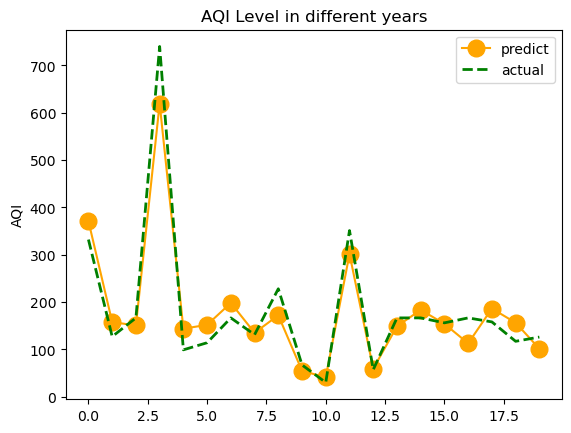

In [43]:
plt.plot(y_predict[:20],color ='orange', 
         marker ='o', markersize = 12,  
         label ='predict')
plt.plot(y_test[:20],color ='g', 
         linestyle ='dashed', linewidth = 2, 
         label ='actual')
plt.title('AQI Level in different years') 
plt.ylabel('AQI')
plt.legend() 
plt.show()

### polynomial regression model
### degree = 2

In [44]:
# make sure you test polynomial regression, first transform the data with 2 degree.
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)

pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

In [45]:
preg.score(poly_reg.fit_transform(x_test), y_test)

0.8504265542040429

In [46]:
pickle.dump(poly_reg, open("D:/2024/Air_Quality/Models/ploy_reg.pkl",'wb'))

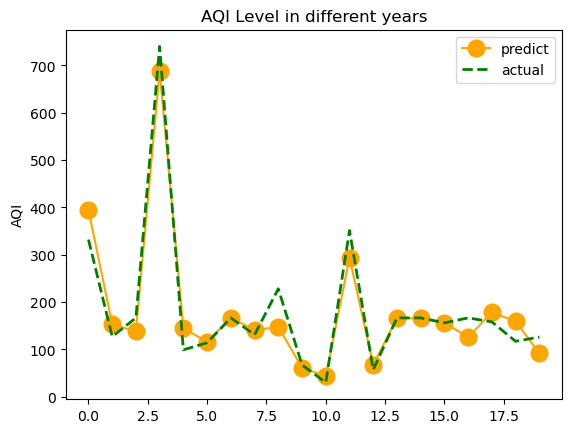

In [47]:
plt.plot(pr_y_predict[:20],color ='orange', 
         marker ='o', markersize = 12,  
         label ='predict')
plt.plot(y_test[:20],color ='g', 
         linestyle ='dashed', linewidth = 2, 
         label ='actual')
plt.title('AQI Level in different years') 
plt.ylabel('AQI')
plt.legend() 
plt.show()

# Decision tree regression model

In [48]:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [49]:
dt_y_predict = dec_tree.predict(x_test)

In [50]:
dec_tree.score(x_test, y_test)

0.7828400201839768

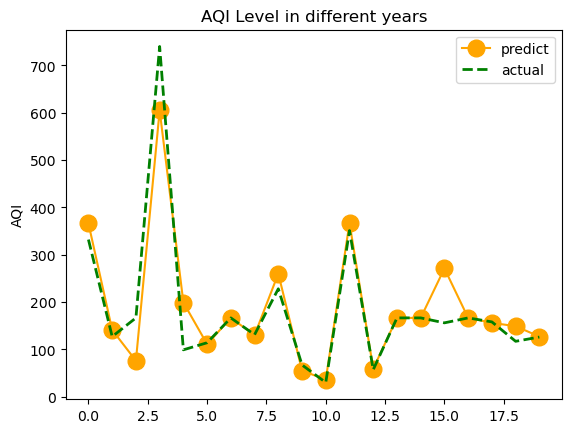

In [51]:
plt.plot(dt_y_predict[:20],color ='orange', 
         marker ='o', markersize = 12,  
         label ='predict')
plt.plot(y_test[:20],color ='g', 
         linestyle ='dashed', linewidth = 2, 
         label ='actual')
plt.title('AQI Level in different years') 
plt.ylabel('AQI')
plt.legend() 
plt.show()

# random forest regression model

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Reshape the target variable y_train and y_test
y_train_reshaped = y_train.ravel()
y_test_reshaped = y_test.ravel()

# Create and train the Random Forest Regressor
rt_reg = RandomForestRegressor(n_estimators=500, random_state=0)
rt_reg.fit(x_train, y_train_reshaped)

# Make predictions
rt_y_predict = rt_reg.predict(x_test)


In [53]:
rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)
rt_y_predict = rt_reg.predict(x_test)

C:\Program Files\Anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [54]:
rt_reg.score(x_test, y_test)

0.8789923046690048

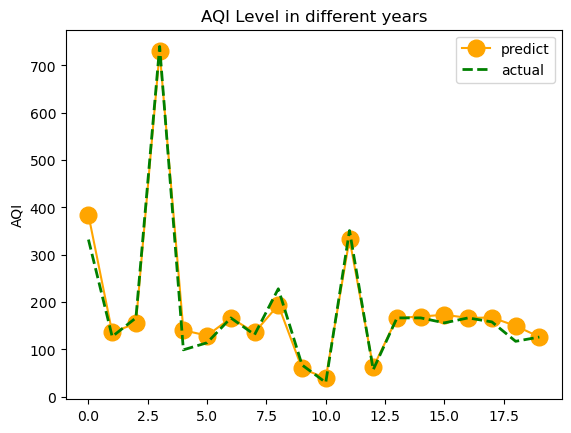

In [55]:
plt.plot(rt_y_predict[:20],color ='orange', 
         marker ='o', markersize = 12,  
         label ='predict')
plt.plot(y_test[:20],color ='g', 
         linestyle ='dashed', linewidth = 2, 
         label ='actual')
plt.title('AQI Level in different years') 
plt.ylabel('AQI')
plt.legend() 
plt.show()

In [56]:
# --- feature scaling the paramenters for better results ---

In [57]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_svr = sc_x.fit_transform(x_train)
# y_train_svr = sc_y.fit_transform(y_train)

In [58]:
pickle.dump(sc_x, open("D:/2024/Air_Quality/Models/Standard_Scaler_X_SVR.pkl",'wb'))

In [59]:
svr_reg = SVR()
svr_reg.fit(x_train_svr,y_train)

C:\Program Files\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [60]:
x_test.shape

(7383, 37)

In [61]:
sc_x.transform(x_test).shape

(7383, 37)

In [62]:
svr_y_predict = svr_reg.predict(sc_x.transform(x_test))

In [63]:
svr_reg.score(sc_x.transform(x_test), y_test)

0.5577245020965855

In [64]:
# svr_y_predict = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_test))) 

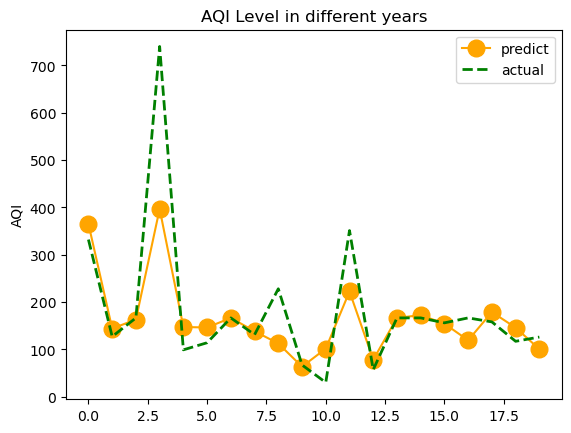

In [65]:
plt.plot(svr_y_predict[:20],color ='orange', 
         marker ='o', markersize = 12,  
         label ='predict')
plt.plot(y_test[:20],color ='g', 
         linestyle ='dashed', linewidth = 2, 
         label ='actual')
plt.title('AQI Level in different years') 
plt.ylabel('AQI')
plt.legend() 
plt.show()

# Use the loaded pickled model to make predictions 

In [66]:
import pickle

In [67]:
pickle.dump(mreg, open("D:/2024/Air_Quality/Models/Multiple Regression.pkl",'wb'))
pickle.dump(preg, open("D:/2024/Air_Quality/Models/pregression.pkl",'wb'))
pickle.dump(dec_tree, open("D:/2024/Air_Quality/Models/Decision tree.pkl",'wb'))
pickle.dump(rt_reg, open("D:/2024/Air_Quality/Models/RandomForest.pkl",'wb'))
pickle.dump(svr_reg, open("D:/2024/Air_Quality/Models/svrression.pkl",'wb'))

### Load Pickle Model

In [68]:
with  open("D:/2024/Air_Quality/Models/pregression.pkl",'rb') as model:
    pregression = pickle.load(model)

In [69]:
# Load model from file
# pregression.predict(x_test) 
pregression.predict(poly_reg.fit_transform(x_test))

array([[394.78999847],
       [153.4278706 ],
       [137.72936887],
       ...,
       [507.35500532],
       [ 64.92048872],
       [359.71267545]])

In [70]:
pregression.score(poly_reg.fit_transform(x_test), y_test)

0.8504265542040429

### Develope Streamlit

In [71]:
model_list=['MR','PR','DTR','RF','SVR']
import streamlit as st
if st.checkbox('select columns to show'):	 
	 selected=st.multiselect('Select',model_list)
	 #new_df=df[selected]
	 st.write(selected)

2024-05-04 21:25:27.943 
  command:

    streamlit run C:\Program Files\Anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
